# Graph Theory & Networks

## Import Graph Tool Modules
    Specifically graph_tool main, draw and collection modules

In [1]:
import graph_tool.all
import graph_tool as gt
import graph_tool.draw
import graph_tool.collection

/home/achal/.virtualenvs/network/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Import Other Required Modules
    These Modules include Matplotlib

In [2]:
import matplotlib as mpl

In [3]:
%matplotlib inline

## View Graph Tool Collection

In [4]:
list(gt.collection.data.keys())

['as-22july06',
 'dolphins',
 'astro-ph',
 'pgp-strong-2009',
 'lesmis',
 'netscience',
 'polbooks',
 'email-Enron',
 'cond-mat-2003',
 'power',
 'football',
 'celegansneural',
 'karate',
 'adjnoun',
 'cond-mat-2005',
 'polblogs',
 'serengeti-foodweb',
 'cond-mat',
 'hep-th']

## Sample Graph Generation

In [5]:
# select graph from library collection
graph = gt.collection.data["football"]

In [6]:
# set position for graph drawing to enforce uniformity
pos = gt.draw.sfdp_layout(graph)

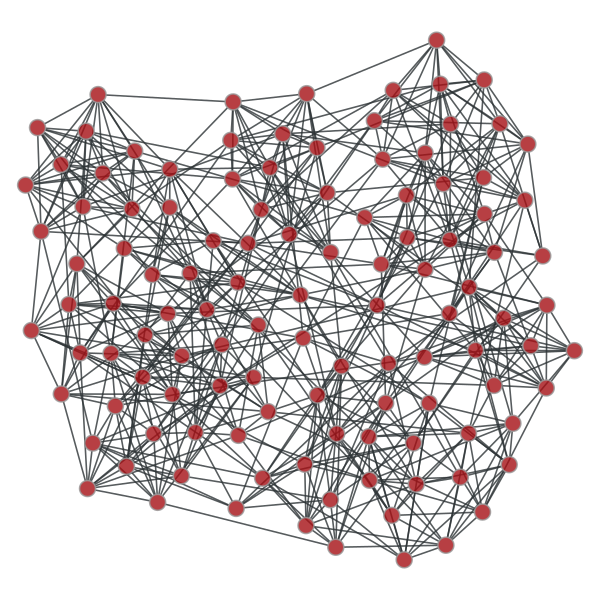

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f45d6622a90, at 0x7f45d6638080>

In [7]:
gt.draw.graph_draw(graph, pos=pos)

## Domination Set Algorithm
    Basic implementation for Computing the domination set of a graph

In [8]:
res = gt.topology.max_independent_vertex_set(graph)

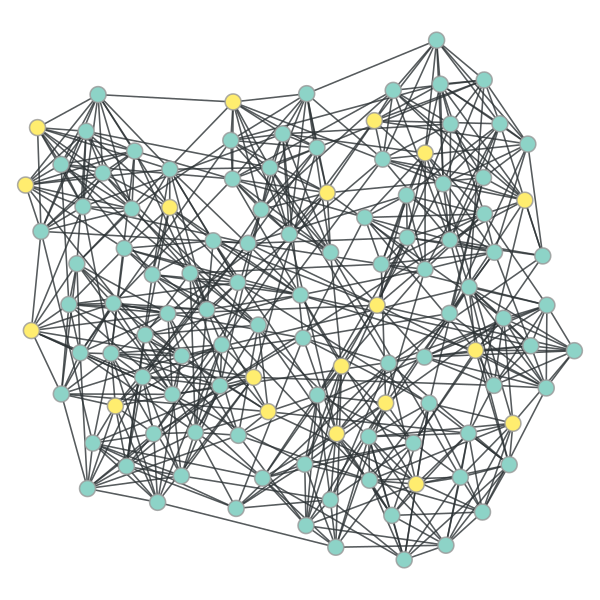

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f45d6622a90, at 0x7f45d6638080>

In [9]:
gt.draw.graph_draw(graph, vertex_fill_color=res, pos=pos)

## Test Exact Algorith w/ Large Graphs

Vertices = 1000


In [10]:
# limit 10
from random import random as random_number
def random_degree_sampler():
    return int((random_number()*10) +2)

### Lattice Graph

In [11]:
random_graph = gt.generation.lattice([5,5,5], periodic=False)

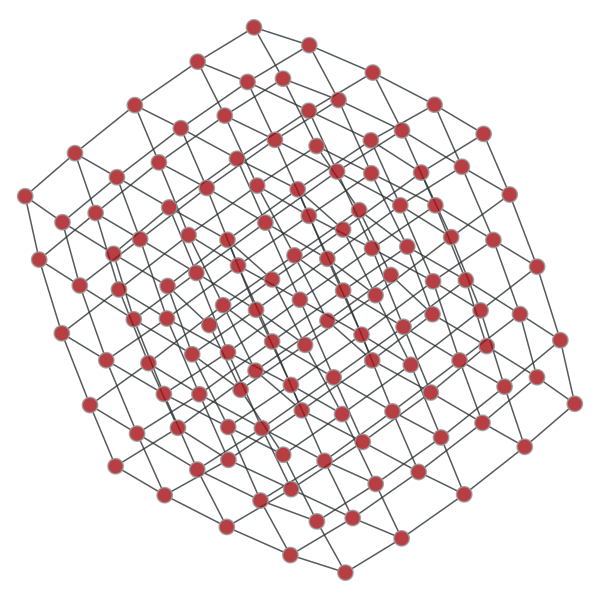

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f45d6644358, at 0x7f45d6942748>

In [12]:
gt.draw.graph_draw(random_graph)

In [13]:
%timeit
random_res = gt.topology.max_independent_vertex_set(random_graph)

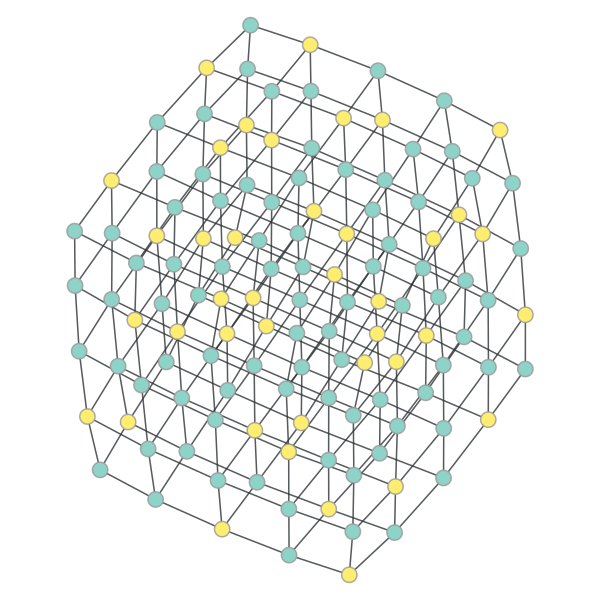

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f45d6644358, at 0x7f45d6644518>

In [14]:
gt.draw.graph_draw(random_graph, vertex_fill_color=random_res )

### Rangom Graph

In [15]:
random = gt.generation.random_graph(N=200, deg_sampler=random_degree_sampler, directed=False, verbose=True )

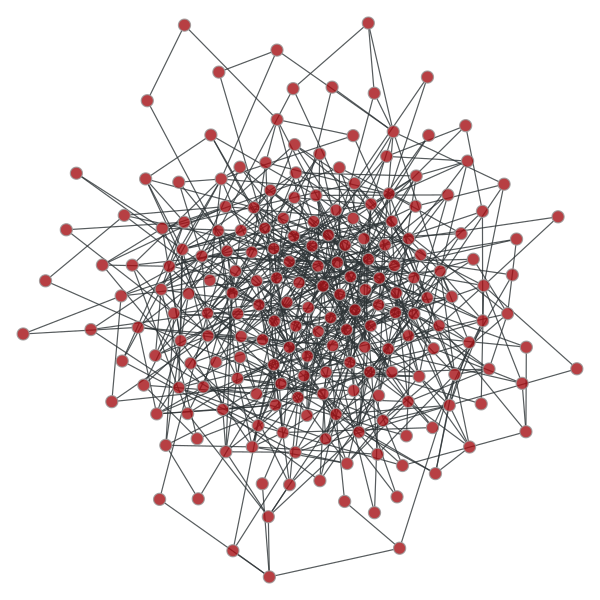

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f45d6644a58, at 0x7f45d66447b8>

In [16]:
gt.draw.graph_draw(random)

In [17]:
random_res = gt.topology.max_independent_vertex_set(random)

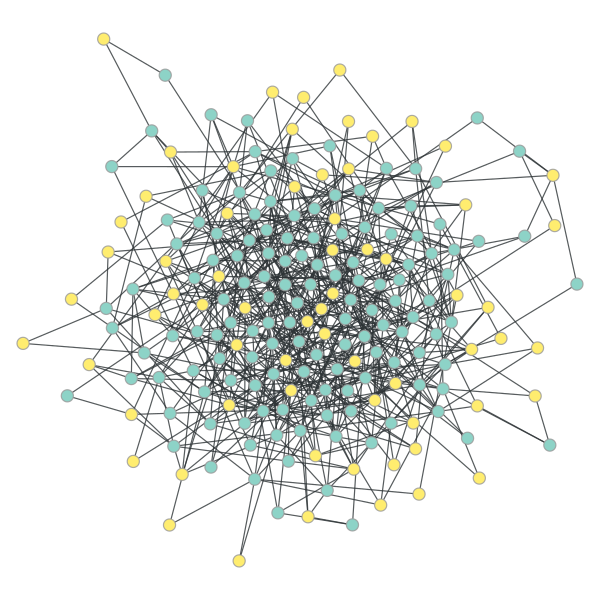

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f45d6644a58, at 0x7f45d6644f28>

In [18]:
gt.draw.graph_draw(random, vertex_fill_color=random_res )

### Circular Graph

In [19]:
def k_degree_sampler(k=2):
    return k

In [20]:
circular_graph = gt.generation.circular_graph(N=200, directed=False, k=1)

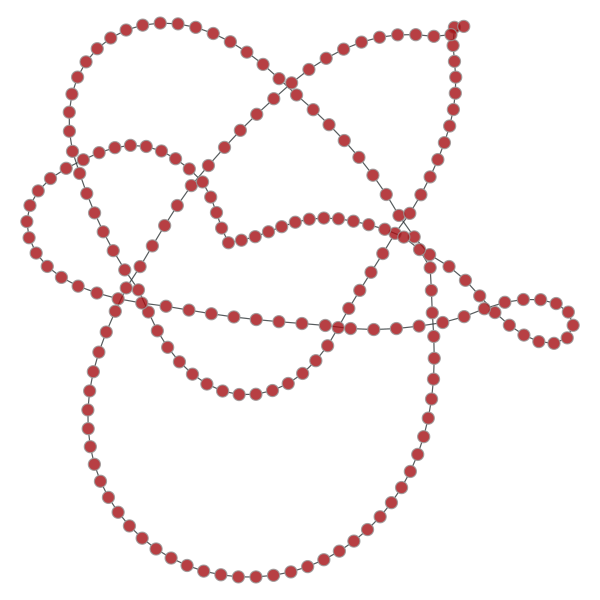

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f45d6644b70, at 0x7f45d65d12b0>

In [21]:
gt.draw.graph_draw(circular_graph)

In [22]:
c_graph_res = gt.topology.max_independent_vertex_set(circular_graph)

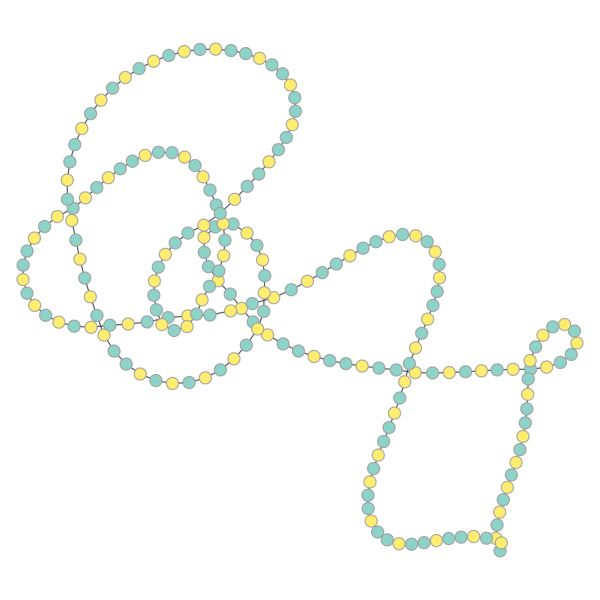

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f45d6644b70, at 0x7f45d65d1208>

In [23]:
gt.draw.graph_draw(circular_graph, vertex_fill_color=c_graph_res)

In [38]:
new = gt.Graph(directed=False)

In [25]:
new.add_vertex(0)

<generator object Graph.add_vertex.<locals>.<genexpr> at 0x7f45d6628f10>

In [39]:
new.add_vertex(5)

<generator object Graph.add_vertex.<locals>.<genexpr> at 0x7f45d664cbf8>

In [44]:
new.add_edge(source=4, target=5)

<Edge object with source '4' and target '5' at 0x7f45d662fd50>

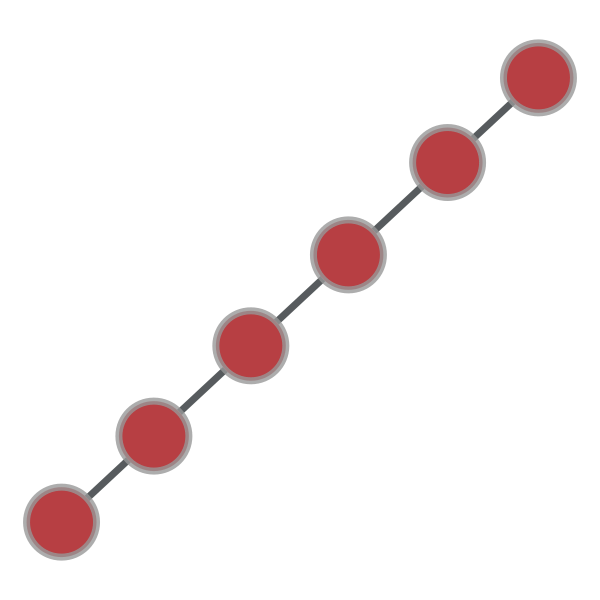

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f45d65d7438, at 0x7f45d65e9128>

In [51]:
gt.draw.graph_draw(new)

In [50]:
new_res = gt.topology.max_independent_vertex_set(new)

In [ ]:
gt.draw.graph_draw(new, vertex_fill_color=new_res)

In [31]:
# given graph G, compute its minimum dominating set (A[i:i+len(w)]==w) and self.wordBreak0(mem

In [72]:
def min_dominating_set(graph):
#     import pdb; pdb.set_trace()
    dominated_set = set()
    dominating_set = set()
    vertex_neighbours_dict = {}
#     total_vertices = len(graph.vertices())
    
    for vertex in graph.vertices():
        vertex_neighbours = set(vertex.out_neighbors())
        vertex_neighbours.add(vertex)
        vertex_neighbours_dict[vertex] = vertex_neighbours
    
#     print(vertex_neighbours_dict)
    
    def get_max_potential_vertex():
        max_potential = 0
        max_p_vertex = None
        for vertex, neighbours in vertex_neighbours_dict.items():
            if len(neighbours) > max_potential:
                max_potential = len(neighbours)
                max_p_vertex = vertex
        return max_p_vertex
    
    while vertex_neighbours_dict:
        current_vertex = get_max_potential_vertex()
#         print("The current vertex is", current_vertex)
#         print("The current dominated set is", dominated_set)
#         print("The neighbours not dominated yet for the current vertex is", vertex_neighbours_dict[current_vertex])
        current_vertex_neighbours = vertex_neighbours_dict.pop(current_vertex, None)
#         print("Recheck", current_vertex_neighbours)
        dominated_set = dominated_set.union(current_vertex_neighbours)
        dominating_set.add(current_vertex)
        to_delete = set()
        for vertex, neighbours in vertex_neighbours_dict.items():
            neighbours = neighbours.difference(current_vertex_neighbours)
            vertex_neighbours_dict[vertex] = neighbours
            if not neighbours:
                to_delete.add(vertex)
        for vertex in to_delete:
            vertex_neighbours_dict.pop(vertex)
        
    
    dominated_property_map = graph.new_vertex_property("bool")
    dominated_property_map.set_value(0)
    for vertex in dominating_set:
        dominated_property_map[vertex] = 1
    
    return dominated_property_map
        

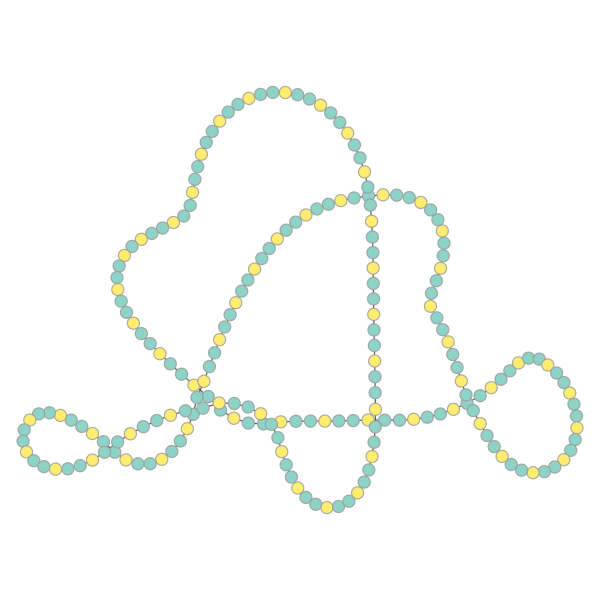

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f45d6644b70, at 0x7f45d6119710>

In [73]:
gt.draw.graph_draw(circular_graph, vertex_fill_color=min_dominating_set(circular_graph))

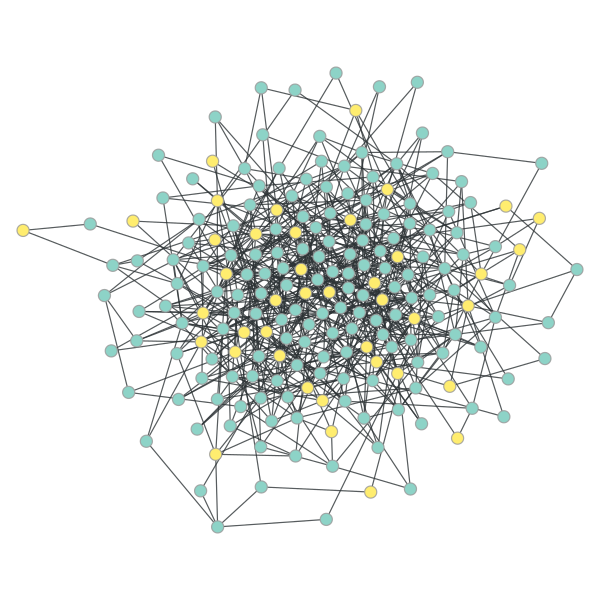

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f45d6644a58, at 0x7f45d61130f0>

In [78]:
gt.draw.graph_draw(random, vertex_fill_color=min_dominating_set(random))

In [77]:
graph

<Graph object, undirected, with 115 vertices and 613 edges at 0x7f45d6622a90>